# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

RAW_PATH = "../data/raw/EU_energy_data.csv"

CLEAN_PATH = "data\ cleaning/data/processed/clean_EU_energy_data.csv"


## Load Data

Link to data source: ```<TODO>```

In [2]:
# 1. Load raw CSV
# Parse 'fecha' as date, keep other columns as appropriate types
df = pd.read_csv(
    RAW_PATH,
    parse_dates=["fecha"],
    dayfirst=True,
    dtype={"hora": int, "sistema": str, "bandera": int, "tipo_moneda": int, "origen_dato": int}
)

# 2. Rename columns to English
df.rename(columns={
    "Unnamed: 0":          "id",
    "fecha":               "date",
    "hora":                "hour",
    "sistema":             "region",
    "bandera":             "flag",
    "precio":              "price",
    "tipo_moneda":         "currency_type",
    "origen_dato":         "data_source",
    "fecha_actualizacion": "last_updated"
}, inplace=True)
display(df.head())

,id,date,hour,region,flag,price,currency_type,data_source,last_updated
0,0,2010-07-21,1,HU,1,39.287,1,6,2021-10-01 12:39:53
1,1,2010-07-21,2,HU,1,35.925,1,6,2021-10-01 12:39:53
2,2,2010-07-21,3,HU,1,33.223,1,6,2021-10-01 12:39:53
3,3,2010-07-21,4,HU,1,30.842,1,6,2021-10-01 12:39:53
4,4,2010-07-21,5,HU,1,33.395,1,6,2021-10-01 12:39:53


## Understand the Data

View the first few rows, get summary statistics and check data types

In [3]:

print("First 5 rows:")
display(df.head())

print("\nInfo (dtypes, non-null counts):")
display(df.info())

print("\nSummary statistics (numeric):")
display(df.describe())

First 5 rows:


,id,date,hour,region,flag,price,currency_type,data_source,last_updated
0,0,2010-07-21,1,HU,1,39.287,1,6,2021-10-01 12:39:53
1,1,2010-07-21,2,HU,1,35.925,1,6,2021-10-01 12:39:53
2,2,2010-07-21,3,HU,1,33.223,1,6,2021-10-01 12:39:53
3,3,2010-07-21,4,HU,1,30.842,1,6,2021-10-01 12:39:53
4,4,2010-07-21,5,HU,1,33.395,1,6,2021-10-01 12:39:53



Info (dtypes, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   date           datetime64[ns]
 2   hour           int32         
 3   region         object        
 4   flag           int32         
 5   price          float64       
 6   currency_type  int32         
 7   data_source    int32         
 8   last_updated   object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(2)
memory usage: 97.8+ MB


None


Summary statistics (numeric):


,id,hour,flag,price,currency_type,data_source
count,1.831555e+06,1.831555e+06,1.831555e+06,1.831555e+06,1.831555e+06,1.831555e+06
mean,9.157770e+05,1.250061e+01,5.811756e-01,4.467074e+01,1.043176e+00,2.354575e+00
std,5.287245e+05,6.923499e+00,4.933667e-01,4.058053e+01,2.032529e-01,1.310058e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,-1.153100e+02,1.000000e+00,1.000000e+00
25%,4.578885e+05,6.000000e+00,0.000000e+00,2.705000e+01,1.000000e+00,2.000000e+00
50%,9.157770e+05,1.300000e+01,1.000000e+00,3.652000e+01,1.000000e+00,2.000000e+00
75%,1.373666e+06,1.900000e+01,1.000000e+00,4.968000e+01,1.000000e+00,2.000000e+00
max,1.831554e+06,2.400000e+01,1.000000e+00,2.999260e+03,2.000000e+00,8.000000e+00


## Handle Missing Data

Identify missing values and fill or drop missing values

In [4]:
# A) datetime-Spalte erzeugen
df['datetime'] = pd.to_datetime(df['date'], dayfirst=True) \
                 + pd.to_timedelta(df['hour'].astype(int) - 1, unit='h')


In [5]:

missing = df.isna().sum().sort_values(ascending=False)
print(missing)

# fill missing prices by interpolation + ffill/bfill
df['price'] = (
    df
    .sort_values(['region','datetime'])
    .groupby('region')['price']
    .apply(lambda s: s.interpolate(limit=6).ffill().bfill())
)

# any other columns with missing?
for col in df.columns[df.isna().any()]:
    if col != 'price':
        df[col] = df[col].fillna(method='ffill').fillna(0)

# check
print(df.isna().sum())



id               0
date             0
hour             0
region           0
flag             0
price            0
currency_type    0
data_source      0
last_updated     0
datetime         0
dtype: int64
id               0
date             0
hour             0
region           0
flag             0
price            0
currency_type    0
data_source      0
last_updated     0
datetime         0
dtype: int64


## Handle Duplicates

Identify duplicates and remove them

In [6]:

print("Before:", df.shape)
df = df.drop_duplicates(subset=['region','datetime'])
print("After:", df.shape)


Before: (1831555, 10)
After: (1831338, 10)


## Handle Outliers

Identify outliers and remove or corret them

In [7]:
mask = ~df['price'].between(0,1000)
df.loc[mask,'price'] = np.nan

# refill price gaps
df['price'] = (
    df
    .sort_values(['region','datetime'])
    .groupby('region')['price']
    .apply(lambda s: s.interpolate(limit=6).ffill().bfill())
)

print("Outliers handled, any NaN in price?", df['price'].isna().any())


Outliers handled, any NaN in price? False


## Handle Incorrect Data Types

In [8]:

df['region'] = df['region'].astype(str)
df['price']  = df['price'].astype(float)
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.dtypes)


Unnamed: 0                      int64
fecha                  datetime64[ns]
hora                            int32
sistema                        object
bandera                         int32
precio                        float64
tipo_moneda                     int32
origen_dato                     int32
fecha_actualizacion            object
datetime               datetime64[ns]
dtype: object


## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

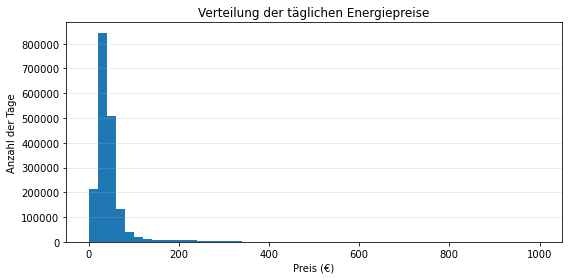

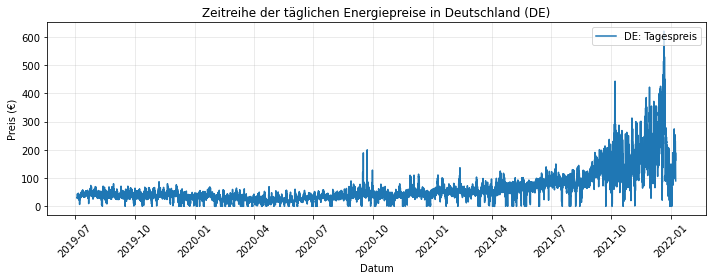

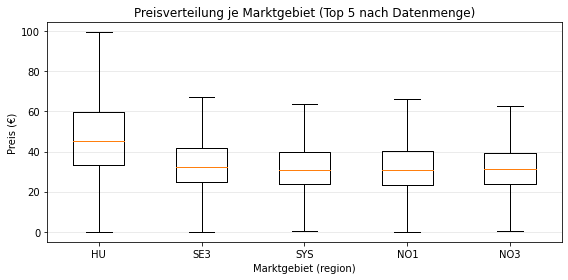

In [8]:
# 6. Visualize Data (beschriftet und formatiert)
import matplotlib.pyplot as plt

# a) Histogramm aller Preise
plt.figure(figsize=(8,4))
plt.hist(df['price'], bins=50)
plt.title("Verteilung der täglichen Energiepreise")
plt.xlabel("Preis (€)")
plt.ylabel("Anzahl der Tage")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# b) Zeitreihe für das Marktgebiet 'DE'
de = df[df['region']=='DE'].set_index('datetime')['price']
plt.figure(figsize=(10,4))
plt.plot(de.index, de.values, label="DE: Tagespreis")
plt.title("Zeitreihe der täglichen Energiepreise in Deutschland (DE)")
plt.xlabel("Datum")
plt.ylabel("Preis (€)")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# c) Boxplot: Preisverteilung für die 5 aktivsten Marktgebiete
top5 = df['region'].value_counts().index[:5]
data_top5 = [df[df['region']==s]['price'] for s in top5]

plt.figure(figsize=(8,4))
plt.boxplot(data_top5, labels=top5, showfliers=False)
plt.title("Preisverteilung je Marktgebiet (Top 5 nach Datenmenge)")
plt.xlabel("Marktgebiet (region)")
plt.ylabel("Preis (€)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



## Save Cleaned Data

In [14]:
df.to_csv("../data/processed/clean_EU_energy_data.csv", index=False)